In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [2]:
df = pd.read_csv('best_sandwiches_list_chicago.csv', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [3]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8">
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport"/>
<meta content="“Truly inspired.”" name="description">
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords">
<meta content="37873197144" property="fb:pages"/>
<link href="//www.googletagservices.com" rel="dns-prefetch">
<link href="//ajax.googleapis.com" rel="dns-prefetch">
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch">
<link href="//media.chicagomag.com" rel="dns-prefetch">
<link href="//ox-d.godengo.com/" rel="dns-prefetch">
<link href="//www.google-analytics.com" rel="dns-prefetch">
<link href="//ping.chartbeat.net" rel="dns-prefetch">
<link h
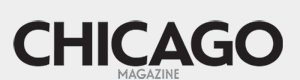

In [4]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, "html.parser")
soup_tmp

In [5]:
print(soup_tmp.find('p','addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


In [6]:
price_tmp = soup_tmp.find('p','addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [7]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [8]:
price_tmp.split()[0]

'$10.'

In [9]:
price_tmp.split()[0][:-1]

'$10'

In [10]:
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

In [11]:
price = []
address = []
for n in df.index[:3]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    gettings = soup_tmp.find('p','addy').get_text()
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

In [12]:
price

['$10', '$9', '$9.50']

In [13]:
address

['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,']

### tqdm module

In [14]:
from tqdm import tqdm_notebook

In [15]:
price= []
address = []
for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    gettings = soup_tmp.find('p','addy').get_text()
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

In [16]:
price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [17]:
df['Price'] = price
df['Address'] = address

df = df.loc[:, ['Rank','Cafe','Menu','Price','Address']]
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [18]:
df.to_csv('best_sandwiches_list_chicago2.csv', sep=',', encoding='UTF-8')

### 맛집 위치를 지도에 표기하기

In [19]:
import folium
import pandas as pd
import googlemaps
import numpy as np

In [20]:
gmaps_key = '********************'

In [21]:
gmaps = googlemaps.Client(key=gmaps_key)

In [23]:
lat = []
lng = []
for n in tqdm_notebook(df.index):
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Cicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
    else:
        lat.append(np.nan)
        lng.append(np.nan)

In [26]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,",41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,",41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,",41.890618,-87.630933
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,",41.886603,-87.648498


In [27]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=11)
folium.Marker([df['lat'].mean(), df['lng'].mean()], popup='center').add_to(mapping)
mapping

In [28]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], 
                     zoom_start=11)

for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], popup=df['Cafe'][n]).add_to(mapping)

mapping